In [230]:
import pandas as pd
def get_data(file_name):
    data = pd.read_csv(file_name).values
    return data[:, 0: -1].astype('float64'), data[:, -1].astype('int')

In [231]:
from sklearn.model_selection import train_test_split
def split_data(points, labels):
    points_train, points_test, labels_train, labels_test = train_test_split(points, labels, train_size=0.8)  
    return points_train, labels_train, points_test,  labels_test

In [232]:
import numpy as np
def h(w, x):
    if (np.sign(np.dot(w, x)) < 0):
        return 0
    else:
        return 1

In [233]:
import matplotlib.pyplot as plt

def draw(w, degree, points,labels):
    X, Y = points, labels
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, .01),
                     np.arange(y_min, y_max, .01))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    fig, ax = plt.subplots()
    Z = np.array([h(w, x) for x in PolynomialFeatures(degree=degree).fit_transform(np.c_[xx.ravel(), yy.ravel()])])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired,alpha=0.5 )

    # Plot also the training points
    ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

    ax.set_title('Perceptron')

In [234]:
from sklearn.preprocessing import PolynomialFeatures
    
def get_error(w, points, labels):
    count = 0
    for i in range(len(points)):
        if (h(w, points[i]) != labels[i]):
            count += 1.0;
    return count/len(points)

def yx(point, label):
    if (label == 0):
        return -1 * point
    return point

def pocket_perceptron(points_train, labels_train, points_test, labels_test, degree, iterations_count):
    points_train = PolynomialFeatures(degree=degree).fit_transform(points_train)
    points_test = PolynomialFeatures(degree=degree).fit_transform(points_test)
    w = np.random.rand(len(points_train[0]))
    w_with_min_error = w
    min_error = get_errors(w, points_test, labels_test)
    for i in range(iterations_count):
        for j in range(len(points_train)):
            if (h(w, points_train[j]) != labels_train[j]):
                w += yx(points_train[j], labels_train[j])
                cur_error = get_error(w, points_test, labels_test)
                if (cur_error < min_error):
                    min_error = cur_error
                    w_with_min_error = w
    return min_error, w_with_min_error

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


min_error = 0.01
w = [ 39.6172114    5.00477622 -18.61585557]


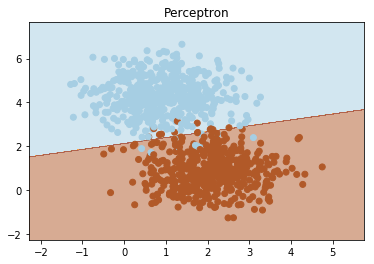

In [235]:
points, labels = get_data("datasets/blobs2.csv")
points_train, labels_train, points_test, labels_test = split_data(points, labels)
min_error, w = pocket_perceptron(points_train, labels_train, points_test, labels_test, 1, 100)
print("min_error = " +str(min_error))
print("w = " +str(w))
draw(w, 1, points, labels)

min_error = 0.01
w = [ 49.76094018  68.519268    77.04188083  15.20591537 -16.86460984
 -42.78249049]


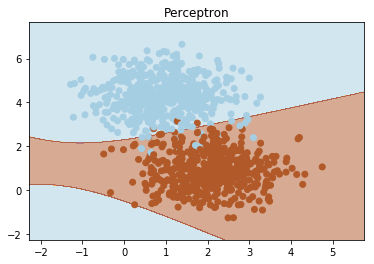

In [236]:
min_error, w = pocket_perceptron(points_train, labels_train, points_test, labels_test, 2, 100)
print("min_error = " +str(min_error))
print("w = " +str(w))
draw(w, 2, points, labels)

min_error = 0.01
w = [  19.26615253  107.94539911  104.81816081  159.15670834  212.34693086
  233.97692114   60.50335502 -173.49677756   -3.9311994  -148.95203269]


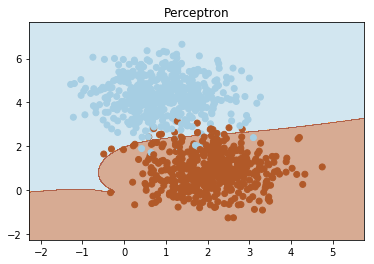

In [237]:
min_error, w = pocket_perceptron(points_train, labels_train, points_test, labels_test, 3, 100)
print("min_error = " +str(min_error))
print("w = " +str(w))
draw(w, 3, points, labels)


min_error = 0.01
w = [ 109.21153637  135.5839687    93.13349317  292.54629898  311.01208889
  458.69174773  333.66836891  392.69882838  629.57147056  690.40921805
  308.02351618 -595.69671308 -386.9342102   182.1712853  -540.3834457 ]


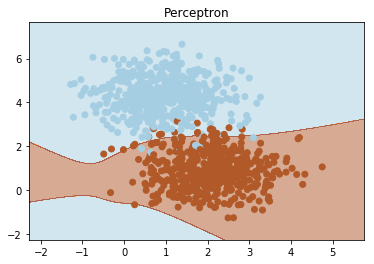

In [238]:
min_error, w = pocket_perceptron(points_train, labels_train, points_test, labels_test, 4, 100)
print("min_error = " +str(min_error))
print("w = " +str(w))
draw(w, 4, points, labels)